In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import normalize, minmax_scale

In [ ]:
# read data from csv isnan = False
health_outcomes = pd.read_csv("../data/best-healthcare-in-the-world-2024.csv", thousands=',')
# single payer countries
single_payers = ['Australia', 'Bahrain', 'Bhutan', 'Botswana', 'Brazil', 'Brunei', 'Canada', 'Cuba', 'Denmark', 'Finland', 'France', 'Georgia', 'Greece', 'Hong Kong', 'Iceland', 'Italy', 'Kuwait', 'Macau'', 'Malaysia', 'Maldives', 'Malta', 'New Zealand', 'North Korea', 'Norway', 'Oman', 'Portugal', 'San Marino', 'Saudi Arabia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Taiwan', 'Trinidad and Tobago', 'Ukraine', 'United Kingdom']

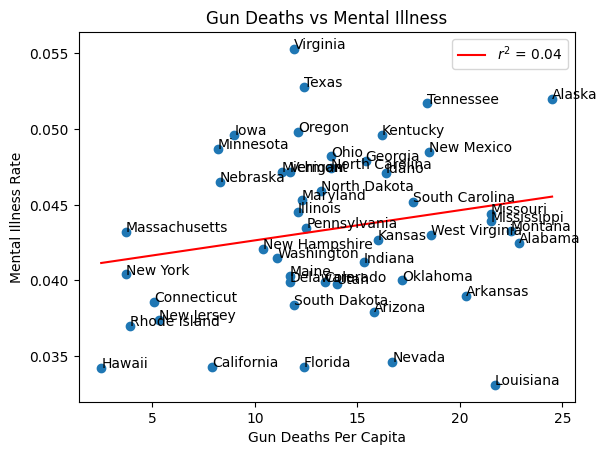

In [ ]:
# Let's do a scatter plot of health outcomes vs single payer!
# merge gun_violence['rate'] and mental_illness['percentageAdults'] on state
df = pd.merge(gun_violence[['state','rate']], mental_illness[['state','percentageAdults']], on='state')
# drop rows where percentageAdults is NaN
df = df.dropna()
# reindex df
df = df.reset_index(drop=True)
x = df['rate']
y = df['percentageAdults']
states = df['state']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Gun Deaths Per Capita')
plt.ylabel('Mental Illness Rate')
plt.title('Gun Deaths vs Mental Illness')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there ignore nan
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

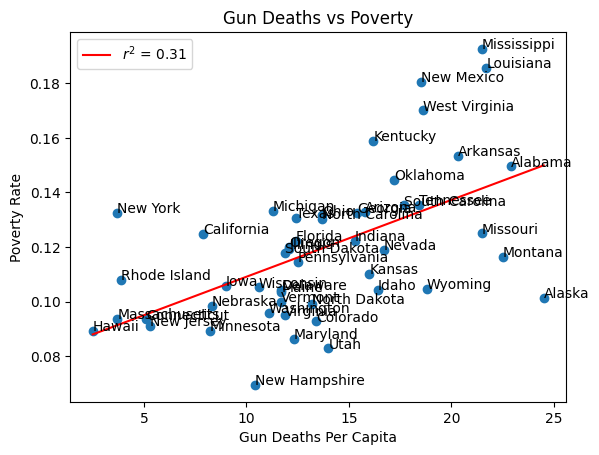

In [36]:
# Now let's do one on poverty!
# merge gun_violence['rate'] and poverty['PovertyRate'] on state
df = pd.merge(gun_violence[['state','rate']], poverty[['state','PovertyRate']], on='state')
x = df['rate']
y = df['PovertyRate']
states = df['state']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Gun Deaths Per Capita')
plt.ylabel('Poverty Rate')
plt.title('Gun Deaths vs Poverty')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there ignore nan
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

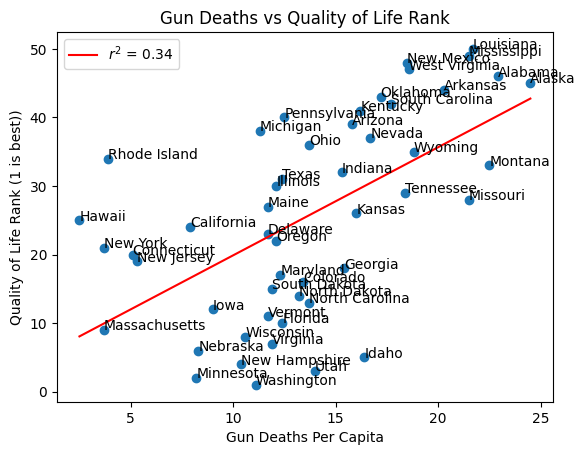

In [45]:
# Now let's do one on quality of life!
# merge gun_violence['rate'] and poverty['lifeQualityRank'] on state
df = pd.merge(gun_violence[['state','rate']], qol[['state','lifeQualityRank']], on='state')
x = df['rate']
y = df['lifeQualityRank']
states = df['state']
plt.scatter(x, y)

# Add some labels
plt.xlabel('Gun Deaths Per Capita')
plt.ylabel('Quality of Life Rank (1 is best))')
plt.title('Gun Deaths vs Quality of Life Rank')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there ignore nan
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()

Text(0, 0.5, 'Average Gun Deaths Per Capita')

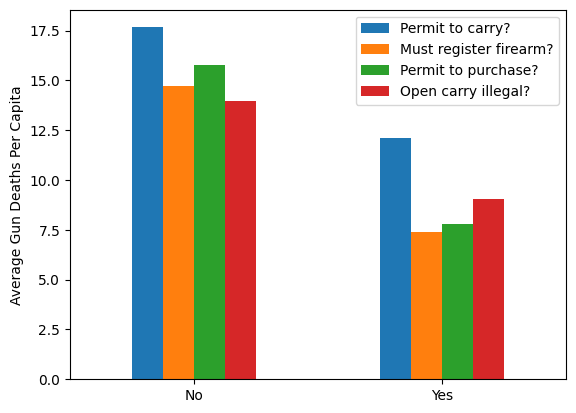

In [98]:
# Now let's do one on gun laws!
# get average per capita deaths with & without permits
df = pd.merge(gun_violence[['state','rate']], gun_laws[['state','firearmRegRequired','permitReqToCarry','permitReqToPurchase','openCarryLegal']], on='state')
df.rename(columns={'openCarryLegal': 'openCarryIllegal'}, inplace=True)
df['openCarryIllegal'].replace({'Yes': 'No', 'No': 'Yes'}, inplace=True)
avg_rate = pd.DataFrame({'Permit to carry?': df.groupby('permitReqToCarry')['rate'].mean(), 'Must register firearm?': df.groupby('firearmRegRequired')['rate'].mean(), 'Permit to purchase?': df.groupby('permitReqToPurchase')['rate'].mean(), 'Open carry illegal?': df.groupby('openCarryIllegal')['rate'].mean()})

# bar plot avg_rate
avg_rate.plot.bar(rot=0)

# label y axis avg gun deaths per capita
plt.ylabel('Average Gun Deaths Per Capita')

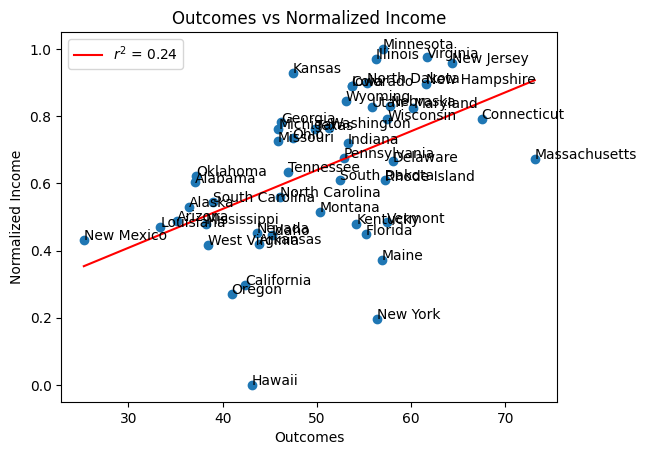

In [36]:
# Outcomes vs normalized family income
y = df["normIncome"]
# bar plot
plt.scatter(x, y)

# Add some labels
plt.xlabel('Outcomes')
plt.ylabel('Normalized Income')
plt.title('Outcomes vs Normalized Income')
for i in range(0,len(x)):
    plt.text(x[i], y[i], states[i])

# Throw a trendline on there
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
# r2 score explains variance
r2 = r2_score(y,p(x))

plt.plot(x, p(x), color="red", label=f"$r^2$ = {r2:0.2f}")

plt.legend()
plt.show()